### Projeto de conclusão de Módulo Machine Learning 1

O projeto de finalização de módulo consiste num fluxo de trabalho completo com Machine Learning. Para desenvolvê-lo, vocês devem escolher um dataset no Kaggle e desenvolver de ponta a ponta uma solução que utilize aprendizado de máquina. Vamos ao passo a passo:

- 1. Escolha um Dataset no Kaggle:
    - Um bom dataset para o projeto contêm pelo menos 1000 linhas
- 2. Defina um problema de negócio a resolver com o Dataset (quero prever X, quero estimar Y)
- 3. Faça o tratamento dos dados e as transformações que achar pertinentes usando o Pandas
- 4. Determine a métrica de avaliação do seu modelo
- 5. Elabore a solução de Machine Learning, usando pelo menos 2 estimadores (para comparar os resultados)
- 6. Faça a otimização de hiperparametros para ambos os estimadores (usando o método mais adequado) e maximize a métrica de interesse.
- 7. Compare os modelos e escolha o melhor
- 8. Responda as perguntas:
    -  Meu modelo resolve adequadamente o problema proposto?
    -  Meu modelo pode ser colocado em produção?
-  9. Apresente para a turma e para o professor

A apresentação é feita em formato livre, e tem duração a combinar, dependendo da quantidade de grupos na turma.

### Alunos: Assuero Meira, Leandro Republicano, Leticia da Luz e Orestes Dos Santos

### Dataset: Heart Attack Risk Prediction Dataset:

**Link:** https://www.kaggle.com/datasets/iamsouravbanerjee/heart-attack-prediction-dataset

**Objetivo:** Desenvolver um modelo preditivo capaz de antecipar o risco de um indivíduo sofrer um ataque cardíaco.

**Resumo do Kaggle:** O Conjunto de Dados de Previsão de Risco de Ataque Cardíaco serve como um recurso valioso para explorar as dinâmicas intricadas da saúde do coração e seus preditores. Os ataques cardíacos, ou infartos do miocárdio, continuam sendo um problema significativo de saúde global, exigindo uma compreensão mais profunda de seus precursores e potenciais fatores mitigadores. Este conjunto de dados encapsula uma variedade diversificada de atributos, incluindo idade, níveis de colesterol, pressão sanguínea, hábitos de fumo, padrões de exercício, preferências dietéticas e muito mais, com o objetivo de elucidar a complexa interação dessas variáveis na determinação da probabilidade de um ataque cardíaco. Ao empregar análises preditivas e aprendizado de máquina neste conjunto de dados, pesquisadores e profissionais de saúde podem trabalhar em direção a estratégias proativas para prevenção e gerenciamento de doenças cardíacas. O conjunto de dados representa um testemunho dos esforços coletivos para aprimorar nossa compreensão da saúde cardiovascular e pavimentar o caminho para um futuro mais saudável.

In [ ]:
#Importação de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from scipy.stats import mannwhitneyu

In [ ]:
# Montando o Google Drive no ambiente do Colab.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Caminho do arquivo
caminho_csv = '/content/drive/MyDrive/projeto_ML_1/heart_attack_prediction_dataset.csv'

In [ ]:
# Carregando o arquivo CSV usando Pandas
df_IAM_risco = pd.read_csv(caminho_csv)

In [ ]:
display(df_IAM_risco)

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0



### Dicionário do Conjunto de Dados (Por Coluna)

- **ID do Paciente/Patient ID** - Identificador único para cada paciente
- **Idade/Age** - Idade do paciente
- **Sexo/Sex** - Gênero do paciente (Masculino/Feminino)
- **Colesterol/Cholesterol** - Níveis de colesterol do paciente
- **Pressão Sanguínea/Blood Pressure** - Pressão sanguínea do paciente (sistólica/diastólica)
- **Frequência Cardíaca/Heart Rate** - Frequência cardíaca do paciente
- **Diabetes** - Se o paciente tem diabetes (Sim/Não)
- **Histórico Familiar/Family History** - Histórico familiar de problemas relacionados ao coração (1: Sim, 0: Não)
- **Fumo/Smoking** - Estado de fumante do paciente (1: Fumante, 0: Não fumante)
- **Obesidade/Obesity** - Estado de obesidade do paciente (1: Obeso, 0: Não obeso)
- **Consumo de Álcool/Alcohol Consumption** - Consumo de álcool pelo paciente (0: Não consome, 1:Consome)
- **Horas de Exercício Por Semana/Exercise Hours Per Week** - Número de horas de exercício por semana
- **Dieta/Diet** - Hábitos alimentares do paciente (Saudável/Médio/Não saudável)
- **Problemas Cardíacos Anteriores/Previous Heart Problems** - Problemas cardíacos anteriores do paciente (1: Sim, 0: Não)
- **Uso de Medicamentos/Medication Use** - Uso de medicamentos pelo paciente (1: Sim, 0: Não)
- **Nível de Estresse/Stress Level** - Nível de estresse relatado pelo paciente (1-10)
- **Horas Sedentárias Por Dia/Sedentary Hours Per Day** - Horas de atividade sedentária por dia
- **Renda/Income** - Nível de renda do paciente
- **IMC/BMI** - Índice de Massa Corporal (IMC) do paciente
- **Triglicerídeos/Triglycerides** - Níveis de triglicerídeos do paciente
- **Dias de Atividade Física Por Semana/Physical Activity Days Per Week** - Dias de atividade física por semana
- **Horas de Sono Por Dia/Sleep Hours Per Day** - Horas de sono por dia
- **País/Country** - País do paciente
- **Continente/Continent** - Continente onde o paciente reside
- **Hemisfério/Hemisphere** - Hemisfério onde o paciente reside
- **Risco de Ataque Cardíaco/Heart Attack Risk** - Presença de risco de ataque cardíaco (1: Sim, 0: Não)

In [ ]:
#Resumo geral das variáveis
df_IAM_risco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [ ]:
#Verificando valores nulos
  df_IAM_risco.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

In [ ]:
#Verificando linhas duplicadas pela coluna identificadora
df_IAM_risco['Patient ID'].duplicated().sum()

0

### Vamos iniciar nossa análise exploratória com a coluna 'age', já que a coluna de ID simplesmente fornece um identificador único para cada paciente.

Text(0, 0.5, 'Frequência')

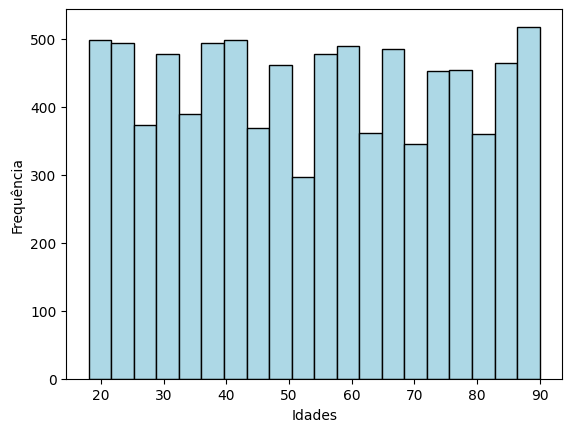

In [ ]:
plt.hist(df_IAM_risco['Age'], color = '#ADD8E6', edgecolor= 'black', bins=20)
plt.xlabel('Idades')
plt.ylabel('Frequência')

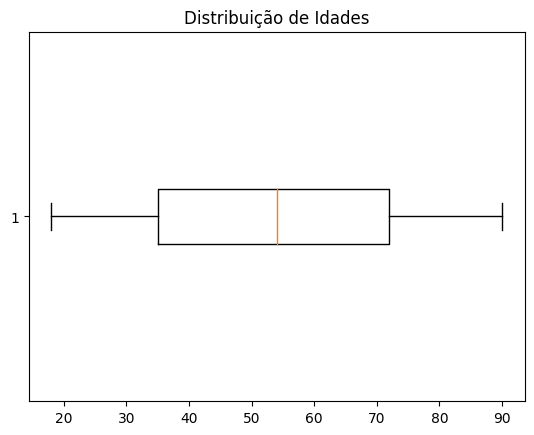

In [ ]:
# Criando um boxplot para a coluna 'Age' e verificando outliers
plt.boxplot(df_IAM_risco['Age'], vert=False)
plt.title('Distribuição de Idades')
plt.show()

In [ ]:
#Verificando as estatísticas da coluna idade
pd.DataFrame(df_IAM_risco['Age'].describe())

,Age
count,8763.000000
mean,53.707977
std,21.249509
min,18.000000
25%,35.000000
50%,54.000000
75%,72.000000
max,90.000000


In [ ]:
#Verificando a idade mais frequente
df_IAM_risco['Age'].mode()

0    90
Name: Age, dtype: int64

- A análise do histograma sugere que as idades estão distribuídas de uma forma relativamente uniforme. Este padrão de distribuição significa que há uma quantidade aproximadamente constante de indivíduos dentro de cada faixa etária específica, com ligeiras variações.
- De acordo com os dados de resumo estatístico fornecidos, a idade média dos indivíduos é de aproximadamente 53,7 anos. Observamos também que 75% da amostra estudada tem mais de 35 anos, o que aponta para uma representação maior de idades maduras na amostra. Além disso, a idade máxima registrada é de 90 anos, também é a idade que mais aparece nos dados.  


**Como  já está bem estabelecido na medicina que o risco de um ataque cardíaco normalmente aumenta à medida que a pessoa envelhece, está variável será adicionada ao modelo**

## Coluna 'Sex':

In [ ]:
# Examinando a proporção de gêneros na amostra
df_IAM_risco['Sex'].value_counts()


Sex
Male      6111
Female    2652
Name: count, dtype: int64

In [ ]:
# Filtrando o DataFrame para incluir apenas as linhas onde 'Age' é menor que 55 anos
filtro = df_IAM_risco[df_IAM_risco['Age'] <55 ]

# Criando uma tabela cruzada com a contagem de gêneros apenas para idades acima de 60
pd.crosstab(filtro['Sex'], filtro['Age'])

Age,18,19,20,21,22,23,24,25,26,27,...,45,46,47,48,49,50,51,52,53,54
Sex,,,,,,,,,,,,,,,,,,,,,
Female,33,45,46,37,29,41,42,49,33,39,...,45,38,29,26,35,38,31,31,32,37
Male,90,83,84,80,95,67,88,83,79,86,...,87,80,70,90,83,90,51,74,78,97


**Também é conhecido  que os homens são mais propensos a ataques cardíacos em comparação com as mulheres que ainda não atingiram a menopausa, no entanto, este risco é igual entre homens e mulheres que atingiram a menopausa. Esse fenômeno é parcialmente atribuído à influência protetora dos hormônios femininos. Filtramos o dataset para verificar se há uma prevalência maior de pacientes do sexo masculino com idade até 55 anos (idade máxima em geral que as mulheres atingem a menopausa), em nosso dados, o que poderia ser relevante para construção de modelos preditivos. Concluímos, portanto, que a variável 'Sex' também parece ser bastante promissora para ser incorporada ao modelo.**


##Coluna 'Cholesterol':

In [ ]:
#Verificando o resumo estatístico da coluna colesterol
pd.DataFrame(df_IAM_risco['Cholesterol'].describe())

,Cholesterol
count,8763.000000
mean,259.877211
std,80.863276
min,120.000000
25%,192.000000
50%,259.000000
75%,330.000000
max,400.000000


In [ ]:
df_IAM_risco['Cholesterol'].mode()

0    235
Name: Cholesterol, dtype: int64

Text(0, 0.5, 'Frequência')

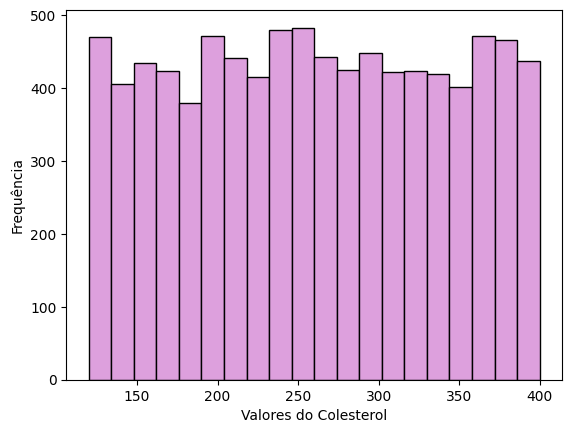

In [ ]:
plt.hist(df_IAM_risco['Cholesterol'], color = '#DDA0DD', edgecolor = 'black', bins = 20)
plt.xlabel('Valores do Colesterol')
plt.ylabel('Frequência')

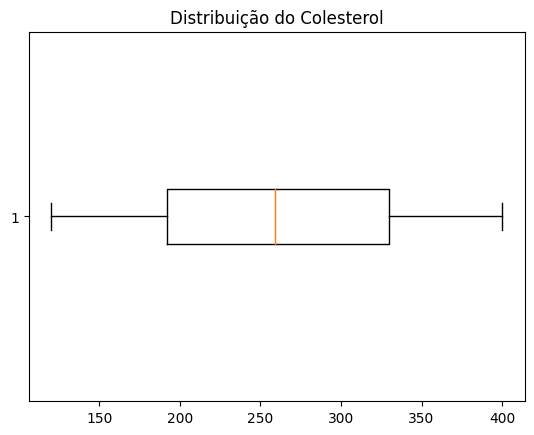

In [ ]:
# Criando um boxplot para a coluna 'Cholesterol' e verificando outliers
plt.boxplot(df_IAM_risco['Cholesterol'], vert=False)
plt.title('Distribuição do Colesterol')
plt.show()

**A distribuição dos valores de colesterol em nosso conjunto de dados aparenta ser uniforme, conforme ilustrado pelo histograma. Este padrão sugere que as ocorrências se distribuem de maneira relativamente equilibrada por toda a faixa de medição. A análise estatística revela que, 75% dos registros apresentam valores de colesterol acima de 192 mg/dL, ultrapassando o limiar considerado desejável pela Sociedade Brasileira de Cardiologia, que é de 190 mg/dL. Esta observação indica uma tendência de elevação dos níveis de colesterol entre os indivíduos analisados.**
-  **É importante ressaltar que o colesterol total não é sozinho um indicador de risco cardiovascular, normalmente o LDL(low density liprotein/lipoproteína de baixa densidade) é estimado junto para verificar o grau de risco, como o LDL é calculado como: LDL= colesterol total - HDL - (triglicerídeos/5), infelizmente não temos como calculá-lo**.
- **Entretanto manter a variável colesterol para criação do nosso modelo, parece ser bastante promissora, uma vez que ele pode somar com a variável triglicerídeos para melhorar o poder preditivo do modelo.**

## Coluna 'Blood Pressure':
 - Primeiro vamos dividir a variável em pressão sistólica e diastólica, para melhorar a legibilidade da variável para o estimador.

In [ ]:
# Dividindoa coluna 'Blood Pressure' em duas novas colunas
df_IAM_risco[['Systolic Pressure', 'Diastolic Pressure']] = df_IAM_risco['Blood Pressure'].str.split('/', expand=True)

In [ ]:
# Convertendo as novas colunas para o tipo inteiro
df_IAM_risco['Systolic Pressure'] = df_IAM_risco['Systolic Pressure'].astype(int)
df_IAM_risco['Diastolic Pressure'] = df_IAM_risco['Diastolic Pressure'].astype(int)

In [ ]:
df_IAM_risco.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic Pressure,Diastolic Pressure
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,165,93
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,174,99
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88


In [ ]:
#Resumo estatístico para pressão sistólica
pd.DataFrame(df_IAM_risco['Systolic Pressure'].describe())

,Systolic Pressure
count,8763.000000
mean,135.075659
std,26.349976
min,90.000000
25%,112.000000
50%,135.000000
75%,158.000000
max,180.000000


In [ ]:
#Visualizando a porcentagem de pacientes com pressão sistólica normal
df_IAM_risco.loc[df_IAM_risco['Systolic Pressure'] <= 139, 'Systolic Pressure'].count()/len(df_IAM_risco)*100

54.49047129978318

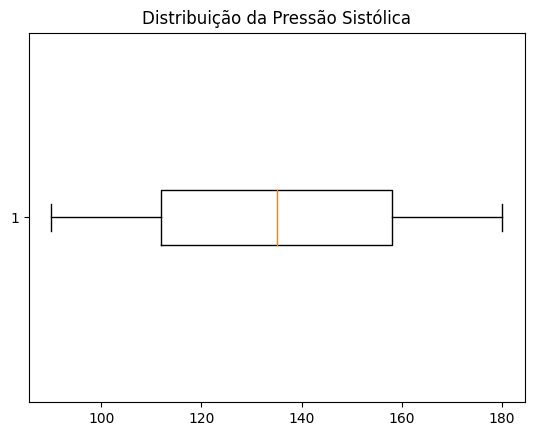

In [ ]:
# Criando um boxplot para a coluna 'Systolic Pressure' e verificando outliers
plt.boxplot(df_IAM_risco['Systolic Pressure'], vert=False)
plt.title('Distribuição da Pressão Sistólica')
plt.show()

In [ ]:
#Resumo estatístico para pressão diastólica
pd.DataFrame(df_IAM_risco['Diastolic Pressure'].describe())

,Diastolic Pressure
count,8763.000000
mean,85.156111
std,14.676565
min,60.000000
25%,72.000000
50%,85.000000
75%,98.000000
max,110.000000


In [ ]:
#Visualizando a porcentagem de pacientes com pressão diastólica normal
df_IAM_risco.loc[df_IAM_risco['Diastolic Pressure'] <= 89, 'Diastolic Pressure'].count()/len(df_IAM_risco)*100

58.14218874814561

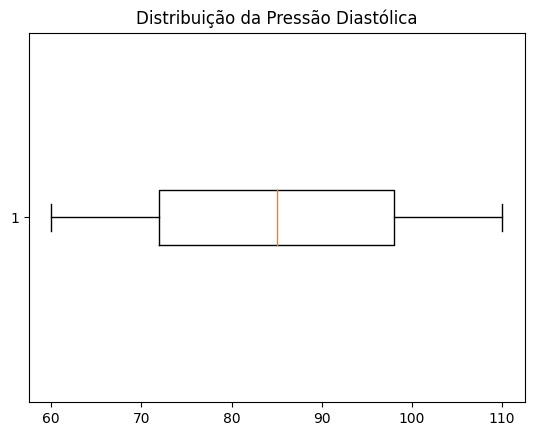

In [ ]:
# Criando um boxplot para a coluna 'Diastolic Pressure' e verificando outliers
plt.boxplot(df_IAM_risco['Diastolic Pressure'], vert=False)
plt.title('Distribuição da Pressão Diastólica')
plt.show()

**Mais da metade dos pacientes apresentam uma pressão arterial dentro dos limites desejáveis, a pressão arterial também é um dos principais fatores de risco para doença coronariana.**

## Colunas 'Diabetes', 'Family History', 'Smoking', 'Obesity' e 'Alcohol Consumption'

In [ ]:
df_IAM_risco['Diabetes'].value_counts()

Diabetes
1    5716
0    3047
Name: count, dtype: int64

In [ ]:
df_IAM_risco['Family History'].value_counts()

Family History
0    4443
1    4320
Name: count, dtype: int64

In [ ]:
df_IAM_risco['Smoking'].value_counts()

Smoking
1    7859
0     904
Name: count, dtype: int64

In [ ]:
df_IAM_risco['Obesity'].value_counts()

Obesity
1    4394
0    4369
Name: count, dtype: int64

In [ ]:
df_IAM_risco['Alcohol Consumption'].value_counts()

Alcohol Consumption
1    5241
0    3522
Name: count, dtype: int64

**- Diabetes:**
  - É bem estabelecido na literatura médica que adultos diabéticos apresentam uma maior chance de desenvolver doenças cardíacas ou sofrer acidentes vasculares cerebrais (AVC) em comparação aqueles sem diabetes. Desta forma, a condição do diabetes contribui significativamente para o aumento do risco cardiovascular.
  - Podemos verificar que a maioria dos pacientes presentes no dados apresenta Diabetes.  

**- História familiar:**
  - História familiar de doença cardiovascular também é uma fator de risco para infarto agudo do miocárdio.
  - Já quanto ao histórico familiar de doença cardiovascular, podemos verificar uma distribuição mais uniforme nos resultados.


**- Fumar:**
  - Fumar é um dos principais fatores de risco para doença coronariana e também uma das principais causas de doenças cardíacas.
  - A maior parte dos pacientes dos dados informou que tem o hábito de fumar, o que  difere do que vem ocorrendo no mundo, em que há uma queda no consumo de tabaco em todo o mundo.

**- Obesidade:**
  - As pessoas com excesso de peso ou obesidade correm maior risco de doenças cardíacas e acidentes vasculares cerebrais e dos seus fatores de risco, incluindo pressão arterial elevada, colesterol LDL elevado, colesterol HDL baixo, triglicéridos elevados e diabetes tipo 2.
  - Em nossos dados, há um equilíbrio entre pacientes obesos e não obesos.

**- Álcool:**
  - Embora pesquisas realizadas na década de 90, as quais careciam de rigor metodológico, sugerissem benefícios à saúde associados ao consumo moderado de álcool — incluindo efeitos protetores para o coração —, evidências recentes oriundas de estudos mais meticulosos têm refutado essa ideia. Publicações recentes, como a disponível no JAMA Network Open [https://jamanetwork.com/journals/jamanetworkopen/fullarticle/2790520], oferecem uma perspectiva atualizada e contestam a ideia de que baixas doses de álcool possam ser vantajosas para a saúde cardiovascular.

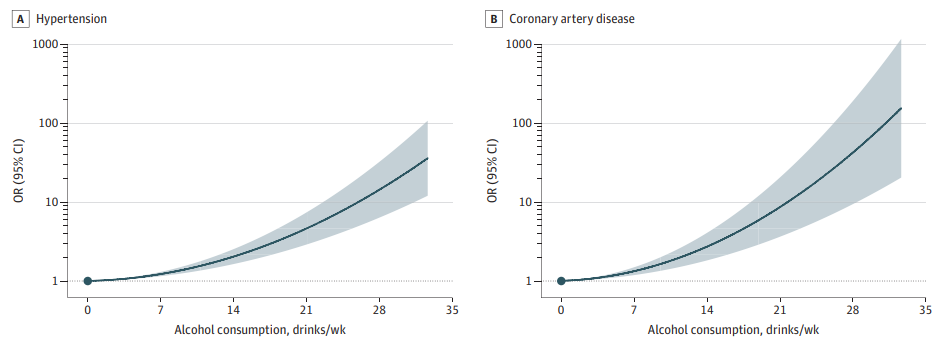


- A OMS publicou, inclusive, em 2023 um artigo informando que não existe um nível de consumo de álcool que possa ser considerado seguro, e descartando qualquer suposto efeito protetor à saúde.  Infelizmente, a percepção equivocada de que o álcool pode ser benéfico em doses moderadas, um equívoco originado de estudos imprecisos dos anos 90, ainda persiste entre o público leigo e profissionais da saúde.
- Em nosso dataset, verificamos que a maioria dos pacientes indica que consome álcool.

**Desta forma, todas estas variáveis serão utilizadas em nosso modelo, porque apresentam forte evidência para o aumento de risco de infarto agudo do miocárdio.**

- Vamos verificar se existe uma associação entre pacientes que possuem fatores de risco para IAM em nossos dados:


In [ ]:
# Criando uma nova coluna 'All_1' que é True se todas as colunas listadas têm o valor 1
df_IAM_risco['All_1'] = df_IAM_risco[['Diabetes', 'Smoking', 'Obesity']].all(axis=1)

# Calculando quantas linhas têm o valor 1 em todas as colunas especificadas ao mesmo tempo
df_IAM_risco['All_1'].sum()

2610

**Cerca de 2.610 pacientes teriam risco aumentado para o desenvolvimento de doenças coronarianas, justamente por apresentarem os três principais fatores de risco relacionados a esta condição.**

## Coluna 'Exercise Hours Per Week':

In [ ]:
pd.DataFrame(df_IAM_risco['Exercise Hours Per Week'].describe())

,Exercise Hours Per Week
count,8763.000000
mean,10.014284
std,5.783745
min,0.002442
25%,4.981579
50%,10.069559
75%,15.050018
max,19.998709


Text(0, 0.5, 'Frequência')

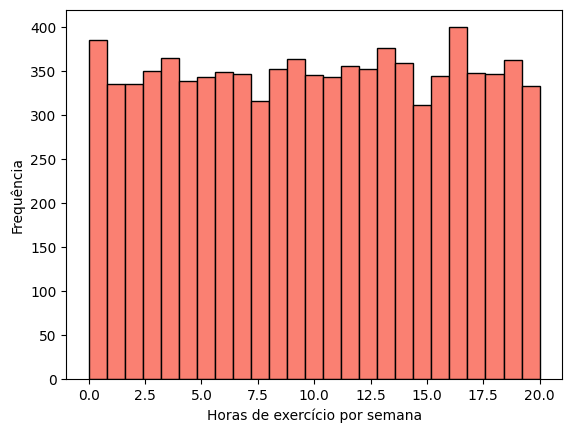

In [ ]:
plt.hist(df_IAM_risco['Exercise Hours Per Week'], color = '#FA8072', edgecolor= 'black', bins = 25)
plt.xlabel('Horas de exercício por semana')
plt.ylabel('Frequência')

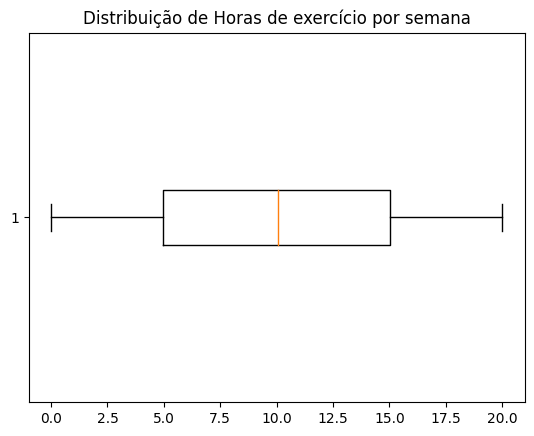

In [ ]:
# Criando um boxplot para a coluna 'Exercise Hours Per Week' e verificando outliers
plt.boxplot(df_IAM_risco['Exercise Hours Per Week'], vert=False)
plt.title('Distribuição de Horas de exercício por semana')
plt.show()

**A inatividade física também pode levar a doenças cardíacas – mesmo para pessoas que não apresentam outros fatores de risco.**
- Cerca de 75% dos pacientes presentes em nosso Dataset alegam que praticam mais de 4.98 horas de exercício por semana, o que é um fator protetor para estes indivíduos.
- Além disto, também identificamos uma distribuição uniforme de horas praticadas entre os pacientes.

## Coluna 'Diet', 'Previous Heart Problems' e 'Medication Use':

In [ ]:
df_IAM_risco['Diet'].value_counts()/len(df_IAM_risco)*100

Diet
Healthy      33.778386
Average      33.230629
Unhealthy    32.990985
Name: count, dtype: float64

In [ ]:
df_IAM_risco['Previous Heart Problems'].value_counts()

Previous Heart Problems
0    4418
1    4345
Name: count, dtype: int64

In [ ]:
df_IAM_risco['Medication Use'].value_counts()

Medication Use
0    4396
1    4367
Name: count, dtype: int64


**- Dieta:**
  - Cerca de 33,78% dos pacientes seguem uma dieta considerada saudável;
  - Outros 33,23% dos pacientes têm hábitos alimentares classificados como médios. Esta categoria pode incluir uma mistura de alimentos saudáveis e opções menos benéficas, como uma maior proporção de comidas processadas ou fast-food;
  -  Por fim, 32,99% dos pacientes adotam uma dieta considerada não saudável. Esse tipo de dieta pode ser caracterizado por uma alta ingestão de alimentos ricos em gorduras saturadas, açúcares adicionados e sal, enquanto falta em componentes essenciais como fibras e vitaminas.

**- Problemas cardíacos anteriores:**
  - No estudo atual, a análise dos dados de pacientes revelou uma distribuição quase igual entre aqueles que têm histórico de problemas cardíacos e aqueles que não têm. Especificamente, 4.418 pacientes no dataset não apresentaram problemas cardíacos anteriores, enquanto 4.345 pacientes relataram ter tido tais problemas no passado.

**- Uso de medicamentos:**
  - A distribuição do uso de medicamentos entre os pacientes do estudo mostra uma divisão quase equilibrada, refletindo nuances importantes na gestão da saúde dos pacientes. De acordo com os dados, 4.396 pacientes atualmente não estão utilizando medicação, enquanto 4.367 pacientes estão fazendo uso de algum tipo de medicamento.



**Dieta e problemas cardíacos anteriores são fatores de risco bem estabelecidos para IAM. Porém, quanto a variável uso de medicamentos não podemos estabelecer uma relação, uma vez que não é informado o tipo de medicamento ou classe de medicamento que cada paciente está utilizando, para contornar este problema vamos realizar um teste de qui-quadrado (chi-square) e verificar se existe  relação entre as variáveis 'Medication Use' e 'Heart Attack Risk'.**

In [ ]:
tabela_contingencia = pd.crosstab(df_IAM_risco['Medication Use'], df_IAM_risco['Heart Attack Risk'])
tabela_contingencia

Heart Attack Risk,0,1
Medication Use,,
0,2826,1570
1,2798,1569


- H0 (Hipótese Nula) = Não há diferença significativa entre as frequências observadas e esperadas, o que, por sua vez, sugere que as variáveis são independentes.
- HA (Hipótese Alternativa) = Há diferença significativa entre as frequências observadas e esperadas,ou seja, as variáveis não são independentes, há associação.
- α=0,05: Vamos utilizar o nível de significância mais comumente usado

In [ ]:
chi2, p_valor, graus_liberdade, frequencias_esperadas = chi2_contingency(tabela_contingencia)
print(f'Chi-quadrado: {chi2}')
print(f'P-valor: {p_valor}')
print(f'Frequências esperadas: \n{frequencias_esperadas}')

Chi-quadrado: 0.03492601858954436
P-valor: 0.8517507680318144
Frequências esperadas: 
[[2821.30594545 1574.69405455]
 [2802.69405455 1564.30594545]]


- **O valor de p obtido é maior que o nível de significância estabelecido a priori de 0.05. Diante desse resultado, falhamos em rejeitar a hipótese nula de que as variáveis são indepedentes. Portanto, com base no valor de p obtido, podemos concluir que não há uma associação estatisticamente significativa entre as variáveis:**

- As frequências esperadas, calculadas como parte do teste, foram:
  - Para 'Medication Use' = 0 e 'Heart Attack Risk' = 0: 2821.31
  - Para 'Medication Use' = 0 e 'Heart Attack Risk' = 1: 1574.69
  - Para 'Medication Use' = 1 e 'Heart Attack Risk' = 0: 2802.69
  - Para 'Medication Use' = 1 e 'Heart Attack Risk' = 1: 1564.31

- Esses valores esperados são próximos às frequências observadas, o que colabora com a noção de que as variáveis comportam-se de maneira independente no conjunto de dados. Sob a hipótese de independência, esperaríamos que a distribuição das categorias fosse uniforme, refletindo uma distribuição conjunta relativamente equilibrada em todas as células da tabela de contingência. Isso significa que a presença ou ausência de uso de medicação não parece influenciar diretamente o risco de ataque cardíaco nos pacientes deste estudo, e vice-versa.
- **Desta forma, esta coluna não será usada para o modelo preditivo.**

## Coluna 'Stress Level':


In [ ]:
pd.DataFrame(df_IAM_risco['Stress Level'].value_counts().sort_index())

,count
Stress Level,
1,865
2,913
3,868
4,910
5,860
6,855
7,903
8,879
9,887


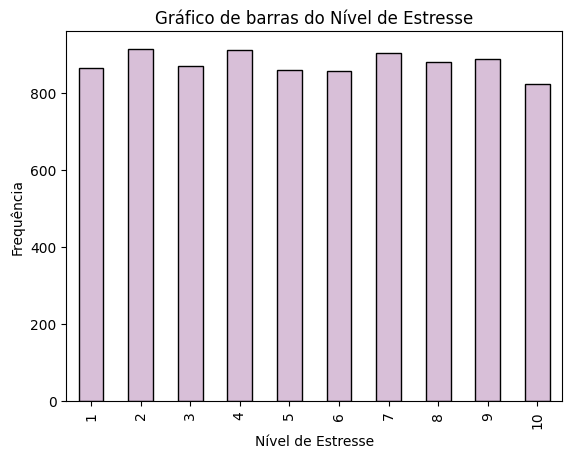

In [ ]:
# Criando um gráfico de barras diretamente a partir da coluna 'Stress Level'
df_IAM_risco['Stress Level'].value_counts().sort_index().plot(kind='bar', color='#D8BFD8', edgecolor='black')
plt.title('Gráfico de barras do Nível de Estresse')
plt.xlabel('Nível de Estresse')
plt.ylabel('Frequência')
plt.show()

- O gráfico de barras apresenta a distribuição dos níveis de estresse dos pacientes em nossos dados. A frequência de cada nível de estresse varia do menor, que é marcado como 1, ao maior, representado pelo número 10. Cada barra, correspondendo a um nível de estresse específico está em uma altura similar, indicando que a quantidade de respostas para cada nível está distribuída de forma equilibrada.
- Pesquisas indicam que o estresse pode aumentar o risco de doenças cardíacas,  estando entrelaçado a práticas de saúde e condições socioeconômicas. Com a progressão do tempo, respostas contínuas e nocivas ao estresse podem ser precursoras de complicações de saúde. Por exemplo, é comum que indivíduos expostos a altos níveis de estresse adotem hábitos alimentares não saudáveis, como a superalimentação, ou recorram ao tabagismo como um mecanismo de enfrentamento, chegando a fumar em quantidades superiores às habituais.

## Coluna 'Sedentary Hours Per Day':

In [ ]:
pd.DataFrame(df_IAM_risco['Sedentary Hours Per Day'].describe())

,Sedentary Hours Per Day
count,8763.000000
mean,5.993690
std,3.466359
min,0.001263
25%,2.998794
50%,5.933622
75%,9.019124
max,11.999313


Text(0, 0.5, 'Frequência')

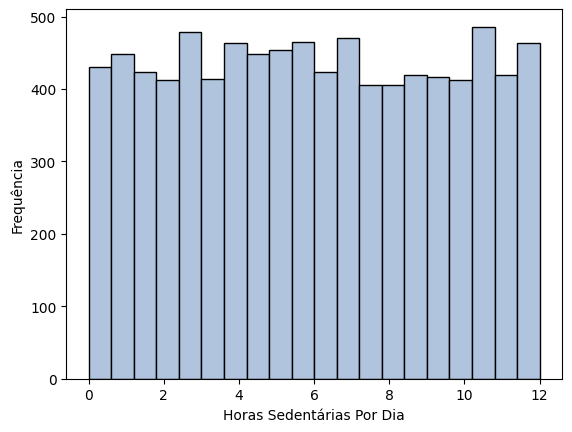

In [ ]:
plt.hist(df_IAM_risco['Sedentary Hours Per Day'], color = '#B0C4DE', edgecolor= 'black', bins = 20)
plt.xlabel('Horas Sedentárias Por Dia')
plt.ylabel('Frequência')

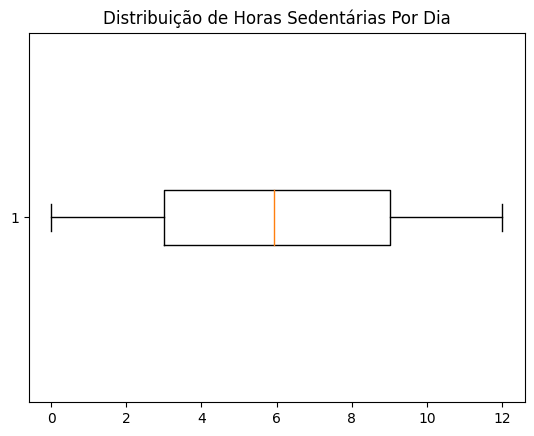

In [ ]:
# Criando um boxplot para a coluna 'Sedentary Hours Per Day' e verificando outliers
plt.boxplot(df_IAM_risco['Sedentary Hours Per Day'], vert=False)
plt.title('Distribuição de Horas Sedentárias Por Dia')
plt.show()

- A análise das horas sedentárias por dia nos traz um panorama interessante. Com base no gráfico de barras e nos dados estatísticos fornecidos, podemos observar que o tempo gasto em atividades sedentárias apresenta uma distribuição relativamente equilibrada, variando de nenhuma a quase 12 horas por dia. A média de horas sedentárias por dia é de aproximadamente 6 horas, o que sugere que um dia típico para a maioria das pessoas inclui uma quantidade significativa de tempo sem atividades físicas intensas.
- **Conforma já discutido, o estilo de vida inativo é um fator de risco para doença coronariana.**

## Coluna 'Income'

In [ ]:
pd.DataFrame(df_IAM_risco['Income'].describe())

,Income
count,8763.000000
mean,158263.181901
std,80575.190806
min,20062.000000
25%,88310.000000
50%,157866.000000
75%,227749.000000
max,299954.000000


Text(0, 0.5, 'Frequência')

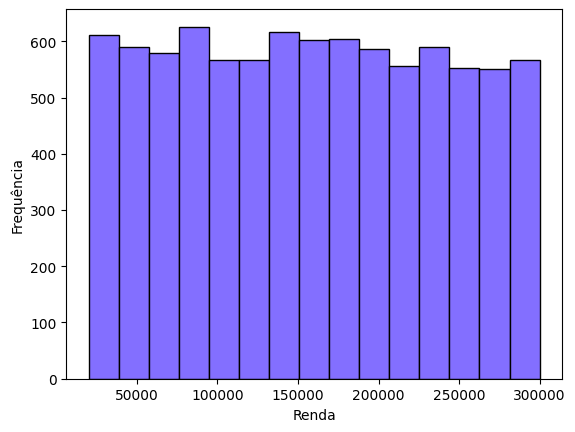

In [ ]:
plt.hist(df_IAM_risco['Income'], color = '#836FFF', edgecolor= 'black', bins = 15)
plt.xlabel('Renda')
plt.ylabel('Frequência')

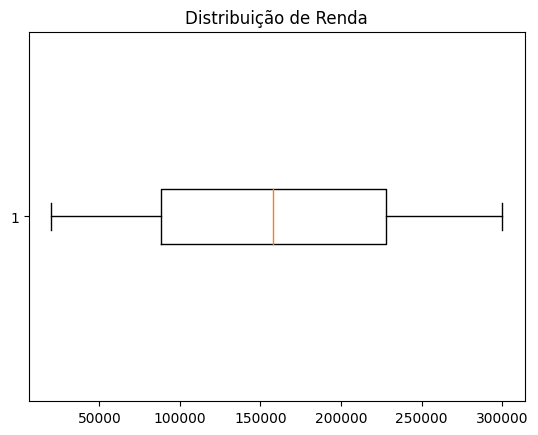

In [ ]:
# Criando um boxplot para a coluna 'Income' e verificando outliers
plt.boxplot(df_IAM_risco['Income'], vert=False)
plt.title('Distribuição de Renda')
plt.show()

O conjunto de dados composto apresenta uma distribuição bastante uniforme, variando entre aproximadamente 20.000 e 300.000. A média de renda situa-se em torno de 158.263, com um desvio padrão de 80.575, indicando uma variação significativa entre as rendas individuais. A mediana é de 157.866, o que revela que a distribuição da renda é relativamente simétrica, com metade das observações abaixo e metade acima deste valor. O primeiro quartil, em 88.310, e o terceiro quartil, em 227.749, mostram uma dispersão equilibrada das rendas. O histograma  colabora com essas observações, refletindo uma distribuição uniforme de renda entre os indivíduos.
- **Para avaliar se existe uma diferença significativa entre as médias de renda dos indivíduos que apresentam risco e aqueles que não, empregaremos o teste t. Caso o resultado seja estatisticamente significativo, isso indicará que a variável renda é um bom preditor para ser incluído em nosso modelo.**

**O teste t de Student, quando aplicado da maneira tradicional, pressupõe que 5 suposições sejam validadas:**

- 1: Os dados são aleatórios e representativos da população.
- 2: A variável do estudo é contínua.
- 3: Ambos os grupos são independentes (ou seja, grupos exaustivos e excludentes).
- 4: Os resíduos do modelo são normalmente distribuídos.
- 5: A variância residual é homogênea (princípio da homocedasticidade)

**Para esta questão, iremos considerar como verdadeiras as suposições de 1 á 3 e validaremos as suposições 4 e 5.**

In [ ]:
#Dividindo o dataset em risco 1 e 0
risco_1 = df_IAM_risco[df_IAM_risco['Heart Attack Risk'] == 1]
risco_1.shape

(3139, 29)

In [ ]:
#Dividindo o dataset em risco 1 e 0
risco_0 = df_IAM_risco[df_IAM_risco['Heart Attack Risk'] == 0]
risco_0.shape

(5624, 29)

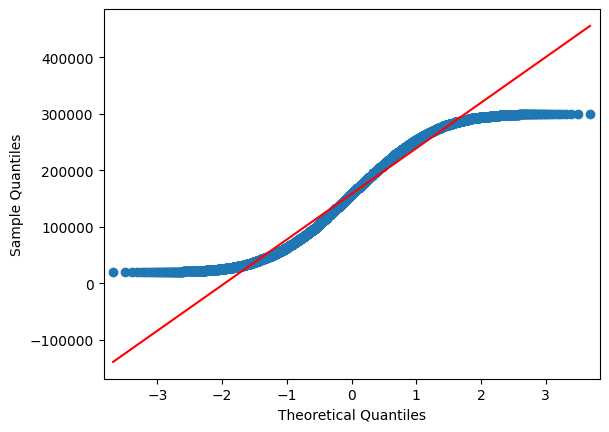

In [ ]:
#Verificando a suposição de normalidade da coluna 'Income' com qqplot:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Criando QQ plot
sm.qqplot(df_IAM_risco['Income'], line='s')
plt.show()

No gráfico, podemos observar que a maioria dos pontos azuis segue a linha vermelha, especialmente no centro da distribuição, mas há desvios nas extremidades. Isso indica que há caudas mais pesadas do que o esperado em uma distribuição normal, sugerindo que os dados têm mais valores extremos. Isso é indicativo de que os dados não são perfeitamente normais
- **Como não podemos validar a suposição de normalidade para esta variável, utilizaremos o teste de Mann-Whitney U.  O teste de Mann-Whitney U é uma alternativa não paramétrica ao teste t de Student para duas amostras independentes. Ele é usado quando as suposições do teste t não são atendidas, como é o caso quando os dados não seguem uma distribuição normal. Ao invés de comparar médias, o teste de Mann-Whitney compara as medianas entre dois grupos.**

- H0 (Hipótese Nula) = Não há diferença significativa entre as medianas das duas amostras.
- HA (Hipótese Alternativa) = Existe uma diferença estatisticamente significativa nas rendas entre os dois grupos.
- α=0,05: Vamos utilizar o nível de significância mais comumente usado

In [ ]:
# Realizando o teste de Mann-Whitney
estatistica_u, p_valor = mannwhitneyu(risco_1['Income'], risco_0['Income'], alternative='two-sided') #teste bicaudal

print('Estatística U:', estatistica_u)
print('P-valor:', p_valor)

Estatística U: 8928751.5
P-valor: 0.3695751889703053


**Com base nesse resultado (valor de p > 0.05), nós falhamos em rejeitar a hipótese nula de que não há diferença significativa entre as medianas das duas amostras. Isso significa que não há diferença estatisticamente significativa entre as medianas de renda dos dos grupos.**
- Esta variável, portanto, não será utilizada na construção do modelo.


## Coluna 'BMI'


In [ ]:
pd.DataFrame(df_IAM_risco['BMI'].describe())

,BMI
count,8763.000000
mean,28.891446
std,6.319181
min,18.002337
25%,23.422985
50%,28.768999
75%,34.324594
max,39.997211


Text(0, 0.5, 'Frequência')

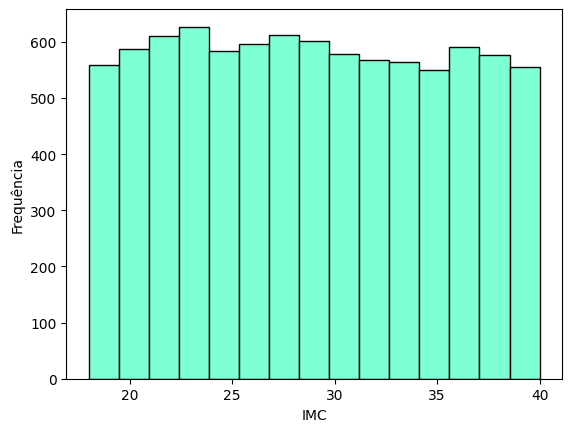

In [ ]:
plt.hist(df_IAM_risco['BMI'], color = '#7FFFD4', edgecolor= 'black', bins = 15)
plt.xlabel('IMC')
plt.ylabel('Frequência')

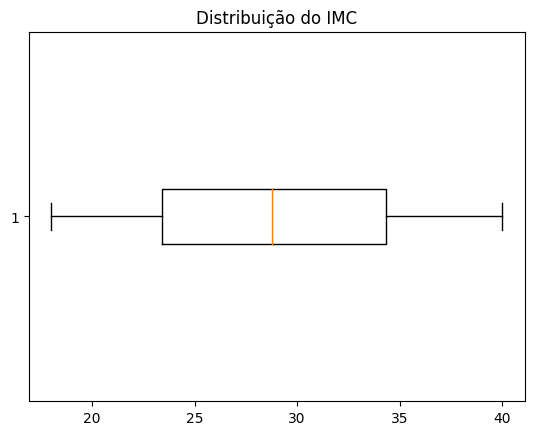

In [ ]:
# Criando um boxplot para a coluna 'BMI' e verificando outliers
plt.boxplot(df_IAM_risco['BMI'], vert=False)
plt.title('Distribuição do IMC')
plt.show()

In [ ]:
# Calculando o percentil de 24.9 em relação à coluna 'BMI'
(df_IAM_risco['BMI'] > 24.9).mean() * 100

68.2186465822207

- A análise das estatísticas descritivas revela um IMC médio de aproximadamente 28,89, com um desvio padrão de 6,32. Isso indica que, em média, os indivíduos deste conjunto de dados estão na categoria de sobrepeso, já que o IMC considerado normal varia de 18,5 a 24,9.
- A distribuição dos dados é relativamente simétrica, o que é evidenciado pela mediana (50%) de 28,77 estar bem próxima da média de 28,89. O histograma mostra uma concentração de frequências em torno da média, com uma redução gradual para valores mais baixos e mais altos de IMC.
- Por meio do percentil, também verificamos que 68% dos valores na coluna 'BMI' são maiores que 24.9, indicando que 68% dos pacientes está com sobrepeso ou obesidade.

## Coluna 'Triglycerides"

In [ ]:
pd.DataFrame(df_IAM_risco['Triglycerides'].describe())

,Triglycerides
count,8763.000000
mean,417.677051
std,223.748137
min,30.000000
25%,225.500000
50%,417.000000
75%,612.000000
max,800.000000


Text(0, 0.5, 'Frequência')

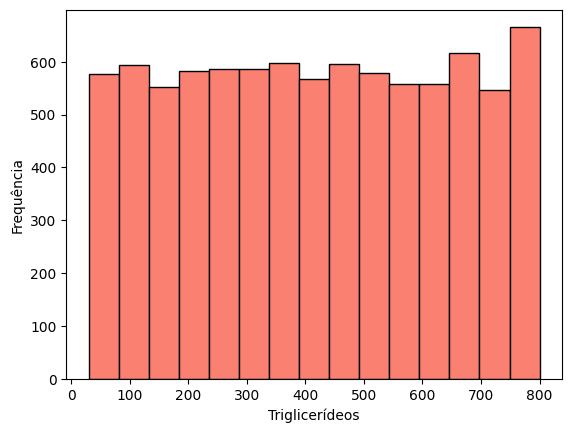

In [ ]:
plt.hist(df_IAM_risco['Triglycerides'], color = '#FA8072', edgecolor= 'black', bins = 15)
plt.xlabel('Triglicerídeos')
plt.ylabel('Frequência')

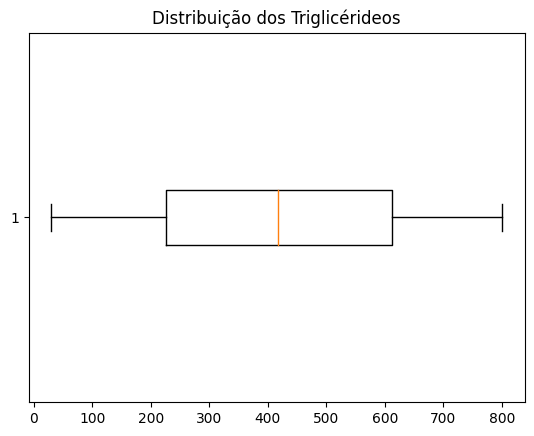

In [ ]:
# Criando um boxplot para a coluna 'BMI' e verificando outliers
plt.boxplot(df_IAM_risco['Triglycerides'], vert=False)
plt.title('Distribuição dos Triglicérideos')
plt.show()

- A análise dos dados de triglicerídeos dos pacientes apresenta uma média de 417.68 mg/dL, apontando para um potencial risco cardiovascular, visto que excede as recomendações médicas. O maior valor em 800 mg/dL, destaca a existência de indivíduos com níveis preocupantemente elevados.
- Os quartis indicam que 25% dos indivíduos possuem níveis de triglicerídeos abaixo de 225.5 mg/dL, situando-se em uma faixa mais segura, enquanto a mediana de 417 mg/dL e o terceiro quartil em 612 mg/dL evidenciam que uma parcela considerável enfrenta níveis altos. A distribuição uniforme com tendência a valores mais altos, conforme o histograma, reforça a necessidade de atenção para aqueles no extremo superior da escala.

## Coluna 'Physical Activity Days Per Week"

In [ ]:
pd.DataFrame(df_IAM_risco['Physical Activity Days Per Week'].value_counts().sort_index())

,count
Physical Activity Days Per Week,
0,1065
1,1121
2,1109
3,1143
4,1077
5,1079
6,1074
7,1095


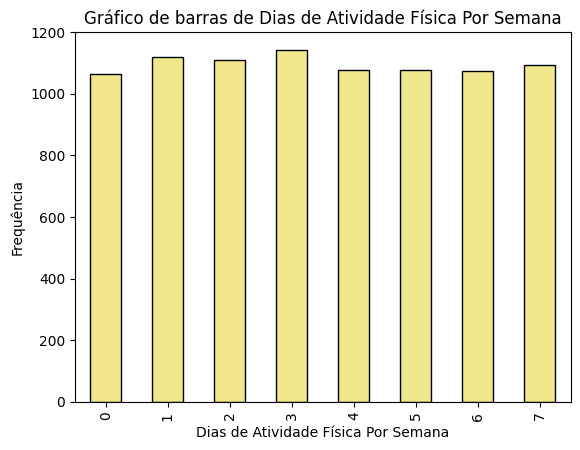

In [ ]:
# Criando um gráfico de barras diretamente a partir da coluna 'Stress Level'
df_IAM_risco['Physical Activity Days Per Week'].value_counts().sort_index().plot(kind='bar', color='#F0E68C', edgecolor='black')
plt.title('Gráfico de barras de Dias de Atividade Física Por Semana')
plt.xlabel('Dias de Atividade Física Por Semana')
plt.ylabel('Frequência')
plt.show()

- Verificamos que 1.065 indivíduos não relataram nenhum dia de atividade física por semana, o que pode ser um indicativo de estilos de vida sedentários. Por outro lado, aqueles que praticaram atividade física pelo menos um dia por semana parecem distribuir-se de maneira relativamente uniforme em todo o espectro de frequência, com as contagens variando de 1.074 a 1.143 para 6 e 3 dias por semana, respectivamente.
- Observando o gráfico de barras, notamos que não há uma tendência clara de aumento ou diminuição da frequência de atividade física com o número de dias praticados. A distribuição é bastante homogênea, sugerindo que há uma divisão quase equitativa entre os participantes em relação ao número de dias dedicados ao exercício físico semanal. Curiosamente, há uma ligeira queda no número de pessoas que se exercitam quatro ou cinco dias por semana, seguida de um pequeno aumento para aqueles que se exercitam todos os dias

## Coluna 'Sleep Hours Per Day'

In [ ]:
pd.DataFrame(df_IAM_risco['Sleep Hours Per Day'].value_counts().sort_index())

,count
Sleep Hours Per Day,
4,1181
5,1263
6,1276
7,1270
8,1288
9,1192
10,1293


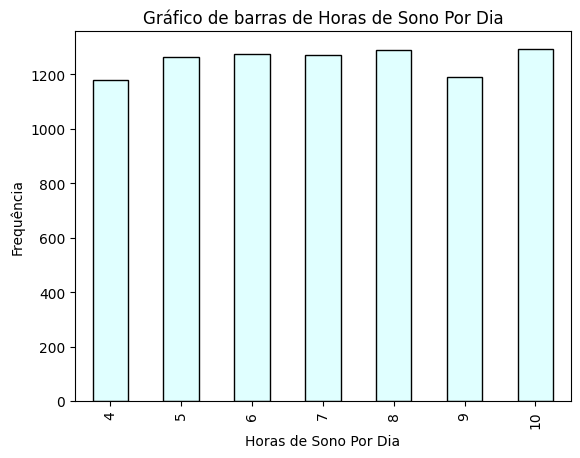

In [ ]:
# Criando um gráfico de barras diretamente a partir da coluna 'Stress Level'
df_IAM_risco['Sleep Hours Per Day'].value_counts().sort_index().plot(kind='bar', color='#E0FFFF', edgecolor='black')
plt.title('Gráfico de barras de Horas de Sono Por Dia')
plt.xlabel('Horas de Sono Por Dia')
plt.ylabel('Frequência')
plt.show()

- A distribuição das horas de sono diárias entre os participantes do estudo mostra que o menor número de horas de sono relatado é de 4 horas e o maior é de 10 horas. A variação é relativamente equilibrada em toda a faixa de 4 a 10 horas, indicando que não há uma quantidade de sono padrão claramente preferida entre os participantes, mas uma tendência a favorecer extremos de menos e mais horas de sono em vez de um equilíbrio no centro.
- O gráfico de barras reflete uma distribuição quase uniforme das preferências de sono, com ligeiras flutuações no número de pessoas em cada categoria. Não há uma predominância clara para a recomendação típica de 7 a 8 horas, com os dados revelando que uma quantidade substancial de pessoas opta por tanto menos quanto mais horas de sono.
- **Como neste dataset 'Horas de Sono Por Dia' se comporta como uma variável discreta ordinal, vamos realizar um teste de qui-quadrado (chi-square) e verificar se existe relação entre as variáveis 'Sleep Hours Per Day' e 'Heart Attack Risk'.**
  - H0 (Hipótese Nula) = Não há diferença significativa entre as frequências observadas e esperadas, o que, por sua vez, sugere que as variáveis são independentes.
  - HA (Hipótese Alternativa) = Há diferença significativa entre as frequências observadas e esperadas,ou seja, as variáveis não são independentes, há associação.
  - α=0,05: Vamos utilizar o nível de significância mais comumente usado

In [ ]:
tabela_contingencia_sono = pd.crosstab(df_IAM_risco['Sleep Hours Per Day'], df_IAM_risco['Heart Attack Risk'])
tabela_contingencia_sono

Heart Attack Risk,0,1
Sleep Hours Per Day,,
4,752,429
5,801,462
6,807,469
7,816,454
8,807,481
9,778,414
10,863,430


In [ ]:
chi2, p_valor, graus_liberdade, frequencias_esperadas = chi2_contingency(tabela_contingencia_sono)
print(f'Chi-quadrado: {chi2}')
print(f'P-valor: {p_valor}')
print(f'Frequências esperadas: \n{frequencias_esperadas}')

Chi-quadrado: 6.550859359161709
P-valor: 0.3643847611853785
Frequências esperadas: 
[[757.95321237 423.04678763]
 [810.57993838 452.42006162]
 [818.92319982 457.07680018]
 [815.07246377 454.92753623]
 [826.62467192 461.37532808]
 [765.01289513 426.98710487]
 [829.83361862 463.16638138]]


- O valor de p obtido é maior que o nível de significância estabelecido a priori de 0.05. Diante desse resultado, falhamos em rejeitar a hipótese nula de que as variáveis são indepedentes. Portanto, com base no valor de p obtido, podemos concluir que não há uma associação estatisticamente significativa entre as variáveis. Isso indica que, dentro deste conjunto de dados e ao nível de confiança usual de 95%, não foi encontrada uma associação significativa entre as duas variáveis.
- As frequências esperadas, que representam a distribuição de frequências que esperaríamos observar se não houvesse associação entre as variáveis, parecem bastante balanceadas entre os grupos com e sem risco de ataque cardíaco, conforme indicado pelos números apresentados. Quando comparamos com as frequências observadas, parece que as diferenças não são suficientes para indicar uma associação estatística.
- **Portanto, não vamos utilizar esta coluna para construção do modelo.**


## Coluna 'Country'

In [ ]:
pd.DataFrame(df_IAM_risco['Country'].value_counts().sort_index())

,count
Country,
Argentina,471
Australia,449
Brazil,462
Canada,440
China,436
Colombia,429
France,446
Germany,477
India,412


- Em relação a variável 'Country'. A coleta dos dados parece estar bem distribuída entre os países, com valores que variam de 42 unidades, no caso do Vietnã, a 477 unidades, registrado na Alemanha. A maioria dos países apresenta contagens na faixa de 400 a 460 unidades, refletindo uma distribuição razoavelmente uniforme das observações ao redor do mundo.
- **Optaremos por não utilizar esta variável, pois a coluna 'Continente' demonstra maior potencial para o desenvolvimento de modelos preditivos. Isso se deve à possibilidade de que fatores genéticos e ambientais específicos de certas regiões possam influenciar o risco associado, tornando a análise por continente mais relevante e informativa para nossos objetivos.**

## Coluna 'Continent'

In [ ]:
pd.DataFrame(df_IAM_risco['Continent'].value_counts().sort_index())

,count
Continent,
Africa,873
Asia,2543
Australia,884
Europe,2241
North America,860
South America,1362


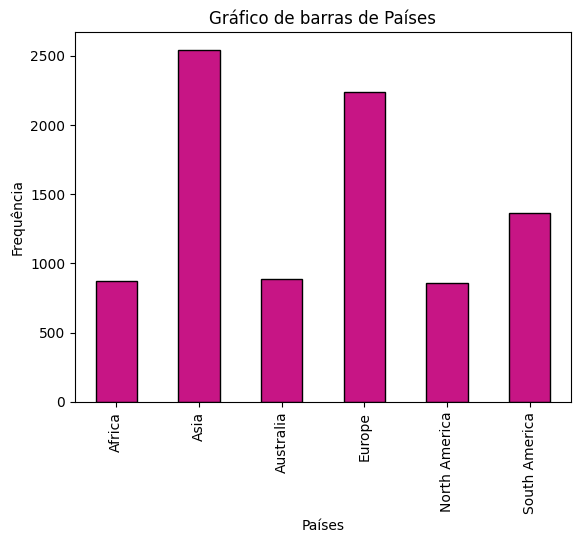

In [ ]:
# Criando um gráfico de barras diretamente a partir da coluna 'Stress Level'
df_IAM_risco['Continent'].value_counts().sort_index().plot(kind='bar', color='#C71585', edgecolor='black')
plt.title('Gráfico de barras de Países')
plt.xlabel('Países')
plt.ylabel('Frequência')
plt.show()

Uma análise estatística dos dados apresentados revela as seguintes contagens por continente: a Ásia lidera com um total de 2.543 ocorrências, seguida pela Europa com 2.241. A América do Sul, com uma contagem de 1.362, também mostra uma frequência significativa, embora substancialmente menor do que os líderes do gráfico. Por outro lado, África, Austrália e América do Norte registram números mais modestos. A África apresenta 873 ocorrências, situando-se no extremo inferior do espectro, junto com a Austrália, que tem uma contagem levemente superior de 884. A América do Norte tem uma frequência próxima, com 860 ocorrências.
- **Para explorar a possível relação entre o risco de ataque cardíaco e o continente de origem, vamos realizar um teste qui-quadrado de independência. Este teste estatístico é utilizado para determinar se existe uma associação significativa entre duas variáveis categóricas. No nosso caso, as duas variáveis são 'Continent' e 'Heart Attack Risk'.**
  - H0 (Hipótese Nula) = Não há diferença significativa entre as frequências observadas e esperadas, o que, por sua vez, sugere que as variáveis são independentes.
  - HA (Hipótese Alternativa) = Há diferença significativa entre as frequências observadas e esperadas,ou seja, as variáveis não são independentes, há associação.
  - α=0,05: Vamos utilizar o nível de significância mais comumente usado.

In [ ]:
tabela_contingencia_continente = pd.crosstab(df_IAM_risco['Continent'], df_IAM_risco['Heart Attack Risk'])
tabela_contingencia_continente

Heart Attack Risk,0,1
Continent,,
Africa,551,322
Asia,1643,900
Australia,565,319
Europe,1466,775
North America,536,324
South America,863,499


In [ ]:
chi2, p_valor, graus_liberdade, frequencias_esperadas = chi2_contingency(tabela_contingencia_continente)
print(f'Chi-quadrado: {chi2}')
print(f'P-valor: {p_valor}')
print(f'Frequências esperadas: \n{frequencias_esperadas}')

Chi-quadrado: 3.8349578559303796
P-valor: 0.573414363302887
Frequências esperadas: 
[[ 560.28209517  312.71790483]
 [1632.07029556  910.92970444]
 [ 567.34177793  316.65822207]
 [1438.24991441  802.75008559]
 [ 551.93883373  308.06116627]
 [ 874.11708319  487.88291681]]


- O valor de p obtido é maior que o nível de significância estabelecido a priori de 0.05. Diante desse resultado, falhamos em rejeitar a hipótese nula de que as variáveis são indepedentes. Portanto, com base no valor de p obtido, podemos concluir que não há uma associação estatisticamente significativa entre as variáveis.
- Comparando as frequências esperadas com as observadas, não identificamos desvios significativos que sugerissem uma associação entre as variáveis.
- Esses resultados nos levam a concluir que, com base nos dados analisados e no teste qui-quadrado realizado, não encontramos evidências suficientes para afirmar que há uma relação estatisticamente significativa entre os continentes e a variável de interesse.
- **Portanto, não vamos utilizar esta coluna para construção do modelo.**


## Coluna 'Hemisphere'
- **Decidimos não utilizar esta variável, uma vez que a coluna continente foi descartada. Portanto, a inclusão desta variável também não contribuirá para a criação do modelo preditivo.**

In [ ]:
pd.DataFrame(df_IAM_risco['Hemisphere'].value_counts())

,count
Hemisphere,
Northern Hemisphere,5660
Southern Hemisphere,3103


In [ ]:
pd.DataFrame(df_IAM_risco['Heart Attack Risk'].value_counts())

,count
Heart Attack Risk,
0,5624
1,3139


In [ ]:
#Colunas removidas após análise exploratória de dados
df_IAM_risco_limpo = df_IAM_risco.drop(columns=['Patient ID', 'Blood Pressure', 'Medication Use', 'All_1', 'Income',
                                                'Sleep Hours Per Day', 'Country', 'Continent', 'Hemisphere'])


In [ ]:
df_IAM_risco_limpo.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Heart Attack Risk,Systolic Pressure,Diastolic Pressure
0,67,Male,208,72,0,0,1,0,0,4.168189,Average,0,9,6.615001,31.251233,286,0,0,158,88
1,21,Male,389,98,1,1,1,1,1,1.813242,Unhealthy,1,1,4.963459,27.194973,235,1,0,165,93
2,21,Female,324,72,1,0,0,0,0,2.078353,Healthy,1,9,9.463426,28.176571,587,4,0,174,99
3,84,Male,383,73,1,1,1,0,1,9.828130,Average,1,9,7.648981,36.464704,378,3,0,163,100
4,66,Male,318,93,1,1,1,1,0,5.804299,Unhealthy,1,6,1.514821,21.809144,231,1,0,91,88


In [ ]:
df_IAM_risco_limpo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   object 
 2   Cholesterol                      8763 non-null   int64  
 3   Heart Rate                       8763 non-null   int64  
 4   Diabetes                         8763 non-null   int64  
 5   Family History                   8763 non-null   int64  
 6   Smoking                          8763 non-null   int64  
 7   Obesity                          8763 non-null   int64  
 8   Alcohol Consumption              8763 non-null   int64  
 9   Exercise Hours Per Week          8763 non-null   float64
 10  Diet                             8763 non-null   object 
 11  Previous Heart Problems          8763 non-null   int64  
 12  Stress Level        

In [ ]:
# Salvandoo DataFrame em disco
df_IAM_risco_limpo.to_csv('df_IAM_risco_final.csv', index=False)